In [25]:
import matplotlib.pyplot as plt
import networkx as nx
from graph import graph_genus, graph_genus_trace

def get_genus(graph_nx, name, chord=False):
    if not chord:
        chords = [list(x) for x in list(graph_nx.edges())]
    else:
        chords = graph_nx
    names = [name]
    g_total = graph_genus([chords], names)
    g_trace = graph_genus_trace([chords], names)
    if not chord:
        nx.draw_networkx(graph_nx)
        plt.savefig('zachary_graph.eps')
        plt.show()
    else:
        gg = nx.Graph()
        gg.add_edges_from(graph_nx)
        nx.draw_networkx(gg)
        plt.show()
    y = g_trace[0].genuses
    x = list(range(len(y)))
    ax = plt.axes()
    ax.plot(x, y) 
    plt.savefig('zachary_genus.eps')
    return g_total[0].genus, g_trace[0].genuses

def compute_comm(b):
    import numpy as np
    b2 = b + [b[-1]]
    b2 = b2[1:]
    res = np.array(b2)-np.array(b)
    res2 = np.where(res==0, 1, 0)
    wynik = []
    l_domain = 0
    for el in res2:
        if el:
            l_domain += 1
        else:
            if l_domain>1:
                wynik.append(l_domain)
            l_domain = 0
    return wynik


G = nx.karate_club_graph()

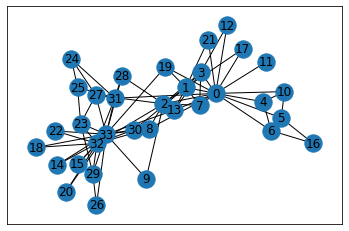

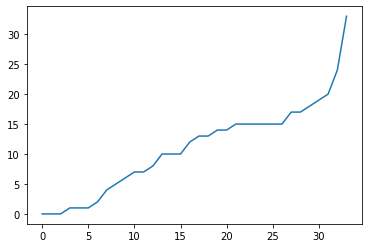

In [26]:
Ggenus, Gg = get_genus(G, 'karate')

In [4]:
compute_comm(Gg)

[2, 2, 2, 5]

In [5]:
l = nx.les_miserables_graph()
### brak indeksów liczbowych - tylko str 

In [6]:
lista = [list(x) for x in list(l.edges())]

In [9]:
import numpy as np
import random

l_u = list(np.unique(lista))
#random.shuffle(l_u)

In [10]:
l_u

['Anzelma',
 'Babet',
 'Bahorel',
 'Bamatabois',
 'BaronessT',
 'Blacheville',
 'Bossuet',
 'Boulatruelle',
 'Brevet',
 'Brujon',
 'Champmathieu',
 'Champtercier',
 'Chenildieu',
 'Child1',
 'Child2',
 'Claquesous',
 'Cochepaille',
 'Combeferre',
 'Cosette',
 'Count',
 'CountessDeLo',
 'Courfeyrac',
 'Cravatte',
 'Dahlia',
 'Enjolras',
 'Eponine',
 'Fameuil',
 'Fantine',
 'Fauchelevent',
 'Favourite',
 'Feuilly',
 'Gavroche',
 'Geborand',
 'Gervais',
 'Gillenormand',
 'Grantaire',
 'Gribier',
 'Gueulemer',
 'Isabeau',
 'Javert',
 'Joly',
 'Jondrette',
 'Judge',
 'Labarre',
 'Listolier',
 'LtGillenormand',
 'Mabeuf',
 'Magnon',
 'Marguerite',
 'Marius',
 'MlleBaptistine',
 'MlleGillenormand',
 'MlleVaubois',
 'MmeBurgon',
 'MmeDeR',
 'MmeHucheloup',
 'MmeMagloire',
 'MmePontmercy',
 'MmeThenardier',
 'Montparnasse',
 'MotherInnocent',
 'MotherPlutarch',
 'Myriel',
 'Napoleon',
 'OldMan',
 'Perpetue',
 'Pontmercy',
 'Prouvaire',
 'Scaufflaire',
 'Simplice',
 'Thenardier',
 'Tholomyes',
 

In [11]:
slownik = { e:i for (i,e) in enumerate(l_u)}

In [12]:
slownik

{'Anzelma': 0,
 'Babet': 1,
 'Bahorel': 2,
 'Bamatabois': 3,
 'BaronessT': 4,
 'Blacheville': 5,
 'Bossuet': 6,
 'Boulatruelle': 7,
 'Brevet': 8,
 'Brujon': 9,
 'Champmathieu': 10,
 'Champtercier': 11,
 'Chenildieu': 12,
 'Child1': 13,
 'Child2': 14,
 'Claquesous': 15,
 'Cochepaille': 16,
 'Combeferre': 17,
 'Cosette': 18,
 'Count': 19,
 'CountessDeLo': 20,
 'Courfeyrac': 21,
 'Cravatte': 22,
 'Dahlia': 23,
 'Enjolras': 24,
 'Eponine': 25,
 'Fameuil': 26,
 'Fantine': 27,
 'Fauchelevent': 28,
 'Favourite': 29,
 'Feuilly': 30,
 'Gavroche': 31,
 'Geborand': 32,
 'Gervais': 33,
 'Gillenormand': 34,
 'Grantaire': 35,
 'Gribier': 36,
 'Gueulemer': 37,
 'Isabeau': 38,
 'Javert': 39,
 'Joly': 40,
 'Jondrette': 41,
 'Judge': 42,
 'Labarre': 43,
 'Listolier': 44,
 'LtGillenormand': 45,
 'Mabeuf': 46,
 'Magnon': 47,
 'Marguerite': 48,
 'Marius': 49,
 'MlleBaptistine': 50,
 'MlleGillenormand': 51,
 'MlleVaubois': 52,
 'MmeBurgon': 53,
 'MmeDeR': 54,
 'MmeHucheloup': 55,
 'MmeMagloire': 56,
 'MmePo

In [13]:
nedzni =[[slownik[el[0]],slownik[el[1]]] for el in lista]

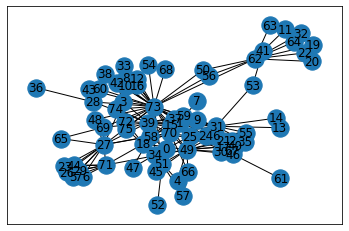

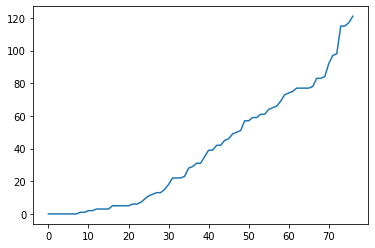

In [14]:
l1, l2 = get_genus(nedzni, 'les_misarables', chord=True)

In [15]:
compute_comm(l2)

[7, 3, 4, 2, 3]

In [20]:
def c():
    w = []
    for i in range(10):
        random.shuffle(l_u)
        slownik = { e:i for (i,e) in enumerate(l_u)}
        nedzni2 =[[slownik[el[0]],slownik[el[1]]] for el in lista]
        _, l22 = get_genus(nedzni2, 'les_misarables', chord=True)
        w.append(compute_comm(l22))
    return w

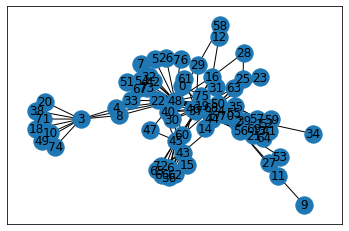

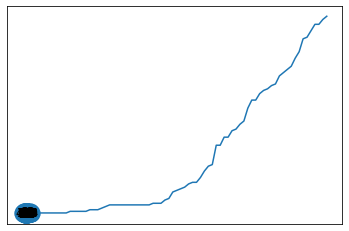

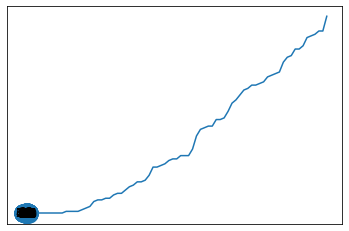

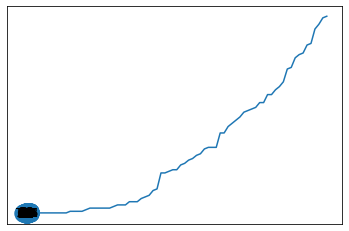

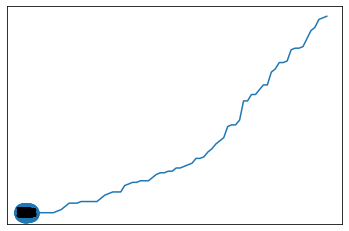

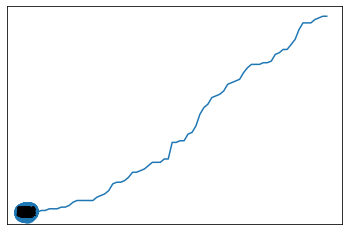

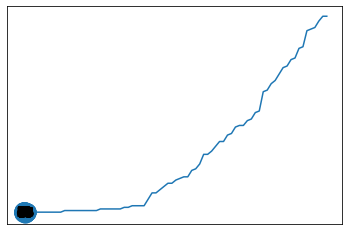

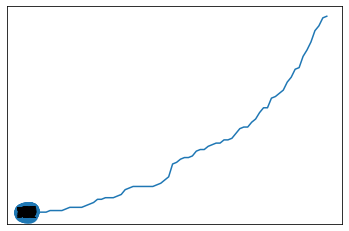

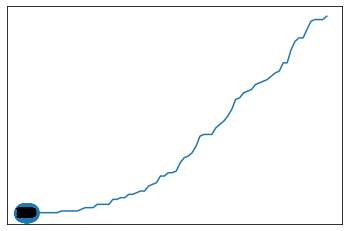

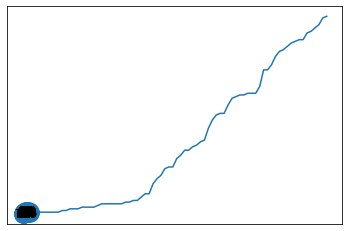

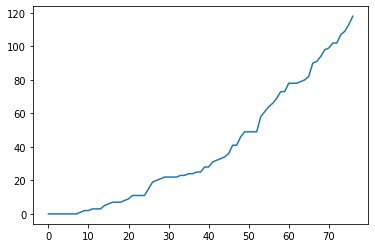

In [21]:
ww = c()

In [22]:
ww

[[10, 4, 2, 10, 2],
 [9, 3, 2],
 [10, 3, 5, 2, 2, 2],
 [7, 2, 4, 2, 2],
 [3, 2, 4, 2, 2, 2],
 [9, 8, 5, 3],
 [5, 3, 3, 2, 5],
 [8, 4, 2, 3, 2, 2],
 [8, 2, 3, 5, 2],
 [7, 2, 2, 3, 3, 3, 2]]

In [29]:
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


/var/folders/67/c10q47f14w5_0wfwq716l0hc0000gn/T/ipykernel_35634/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


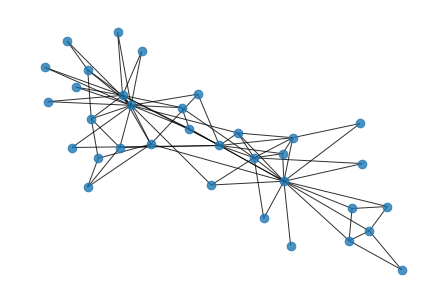

In [30]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

In [31]:
from community import community_louvain

In [32]:
comms = community_louvain.best_partition(G)

In [34]:
comms

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 2,
 6: 2,
 7: 0,
 8: 1,
 9: 1,
 10: 2,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 2,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 3,
 24: 3,
 25: 3,
 26: 1,
 27: 3,
 28: 3,
 29: 1,
 30: 1,
 31: 3,
 32: 1,
 33: 1}

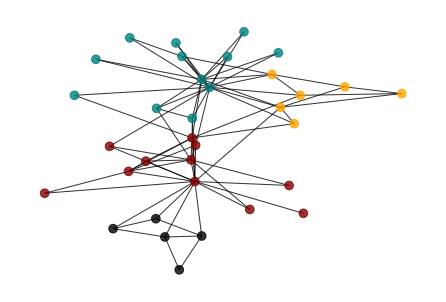

In [33]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

In [ ]:
# Within community nodes - ?? 
# HHI for grapf

In [29]:
a1 = nx.circular_ladder_graph(10)

In [32]:
a1.edges()
w1 = [list(x) for x in list(a1.edges())]
n1 = ['circ1']

In [33]:
gt1 = graph_genus_trace([w1], n1)

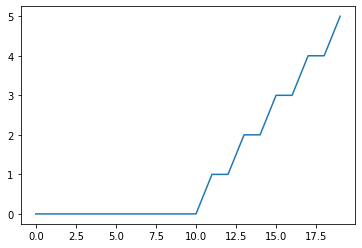

In [39]:
picture(gt1[0])

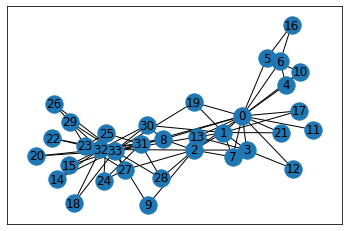

In [40]:
nx.draw_networkx(G)
plt.show()

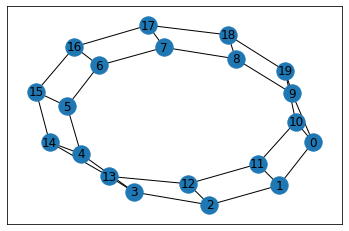

In [41]:
nx.draw_networkx(a1)
plt.show()

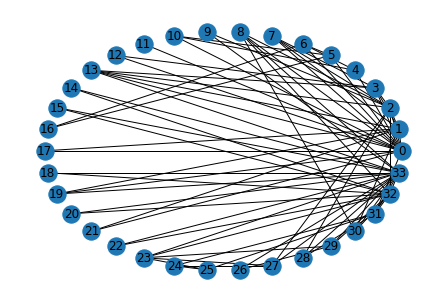

In [46]:
nx.draw_circular(G, with_labels=True)
plt.show()